# Data Preprocessing: Drug Reviews Dataset

Source: https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# import the train data set 
df_drugReviews = pd.read_csv("./dataset_drugs/drugsComTrain_raw.tsv", sep='\t')

In [3]:
# get a sense of the data
df_drugReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
Unnamed: 0     161297 non-null int64
drugName       161297 non-null object
condition      160398 non-null object
review         161297 non-null object
rating         161297 non-null float64
date           161297 non-null object
usefulCount    161297 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


Attribute Information:

1. drugName (categorical): name of drug 
2. condition (categorical): name of condition 
3. review (text): patient review 
4. rating (numerical): 10 star patient rating 
5. date (date): date of review entry 
6. usefulCount (numerical): number of users who found review useful

In [4]:
df_drugReviews.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
# see the kinds of conditions for which there are drug reviews
df_drugReviews['condition'].value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [6]:
# How many drug reviews are about Diabetes?
df_drugReviews['condition'].str.contains('Diabetes').value_counts()[True]

2709

In [7]:
# Check how many missing values in the 'condition' column
df_drugReviews.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [8]:
# Let's fill the missing values with 'Unknown'
df_drugReviews['condition'] = df_drugReviews['condition'].fillna("Unknown")

In [9]:
# Now, let's check to see if the missing values were filled
df_drugReviews.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [10]:
# Filter to only keep reviews about diabetes

df_diabetesDrugR = df_drugReviews[df_drugReviews['condition'].str.contains('Diabetes')]

In [11]:
# Let's check it out. New dataframe

df_diabetesDrugR.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
146,156730,Dulaglutide,"Diabetes, Type 2","""I was recently referred to a endocrinologist ...",9.0,"November 5, 2015",12
168,26916,Insulin degludec,"Diabetes, Type 1","""My Endo insisted I switch from lantus to tres...",1.0,"May 1, 2017",12
182,82188,Liraglutide,"Diabetes, Type 2","""have only been on victorza for a few days. I...",5.0,"January 28, 2016",18
187,32822,Empagliflozin,"Diabetes, Type 2","""I have been taking Jardiance for just over a ...",10.0,"January 6, 2017",47


In [12]:
# Looks like there is drug reviews about different kinds of Diabetes.

df_diabetesDrugR['condition'].value_counts()

Diabetes, Type 2        2554
Diabetes, Type 1         140
Diabetes Insipidus        14
Gestational Diabetes       1
Name: condition, dtype: int64

In [13]:
# Since we are only focusing on Type 2 Diabetes, let's filter it 

df_diabetesT2DrugR = df_diabetesDrugR[df_diabetesDrugR['condition'].str.contains('Type 2')]

In [14]:
# Now lets check out new dataframe

df_diabetesT2DrugR.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
146,156730,Dulaglutide,"Diabetes, Type 2","""I was recently referred to a endocrinologist ...",9.0,"November 5, 2015",12
182,82188,Liraglutide,"Diabetes, Type 2","""have only been on victorza for a few days. I...",5.0,"January 28, 2016",18
187,32822,Empagliflozin,"Diabetes, Type 2","""I have been taking Jardiance for just over a ...",10.0,"January 6, 2017",47
223,178948,Victoza,"Diabetes, Type 2","""I&#039;ve been on Victoza for 13 days and hav...",10.0,"November 29, 2010",6


In [15]:
# Some info on how many reviews we have. 

df_diabetesT2DrugR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2554 entries, 50 to 161278
Data columns (total 7 columns):
Unnamed: 0     2554 non-null int64
drugName       2554 non-null object
condition      2554 non-null object
review         2554 non-null object
rating         2554 non-null float64
date           2554 non-null object
usefulCount    2554 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 159.6+ KB


In [16]:
# let's see how many kinds of drugs we have

df_diabetesT2DrugR['drugName'].value_counts()

Liraglutide                                  270
Victoza                                      255
Dulaglutide                                  231
Trulicity                                    221
Exenatide                                    192
Canagliflozin                                146
Invokana                                     143
Bydureon                                     136
Metformin                                     81
Sitagliptin                                   51
Byetta                                        51
Dapagliflozin                                 50
Januvia                                       47
Insulin glargine                              42
Empagliflozin                                 41
Farxiga                                       40
Jardiance                                     39
Glimepiride                                   33
Glipizide                                     29
Janumet                                       26
Pioglitazone        

In [17]:
# lowercase everything in the 'drugName' column

df_diabetesT2DrugR['drugName'] = df_diabetesT2DrugR['drugName'].str.lower()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# convertion
 #example: empagliflozin / linagliptin  to empagliflozin-linagliptin
    
df_diabetesT2DrugR['drugName'] = df_diabetesT2DrugR['drugName'].str.replace(' / ','-')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
# see all uniques values in column

df_diabetesT2DrugR['drugName']

50                                    dulaglutide
146                                   dulaglutide
182                                   liraglutide
187                                 empagliflozin
223                                       victoza
251                                   liraglutide
256                                   liraglutide
271                                     exenatide
281                                      bydureon
288                                       victoza
298                                       victoza
372                                   dulaglutide
434                                     exenatide
521                                     exenatide
631                                     trulicity
635                                   sitagliptin
770                                 empagliflozin
806                                     trulicity
888                                   liraglutide
1073                                       toujeo


In [21]:
# Only keep drugs in this dataset that are also included in the diabetes dataset

# import the diabetes dataset

diabetesData = pd.read_csv("./dataset_diabetes/diabetic_data.csv", na_values=["?"])   
  # In the original dataset, the missing values were marked as "?". We replace the "?" with na values

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
# This dataset has 23 features for medications. 
diabetesData.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [23]:
# List and dataframe with only those 23 medications

dDrugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

df_dDrugs = pd.DataFrame()
df_dDrugs['drugName'] = dDrugs

In [24]:
df_dDrugs.head()

,drugName
0,metformin
1,repaglinide
2,nateglinide
3,chlorpropamide
4,glimepiride


In [25]:
# double check the number of medication in list
len(dDrugs)

23

In [26]:
# let's do inner join to only keep reviews about drugs in the diabetes dataset

df_reviewsFiltered = pd.merge(df_dDrugs, df_diabetesT2DrugR, on='drugName', how='inner')

In [27]:
df_reviewsFiltered['drugName'].value_counts()

metformin                   81
glimepiride                 33
glipizide                   29
pioglitazone                24
rosiglitazone                5
glyburide                    4
repaglinide                  4
glipizide-metformin          2
glyburide-metformin          2
acarbose                     1
glimepiride-pioglitazone     1
Name: drugName, dtype: int64

In [37]:
# Since we have sparse data for some of the drugs, lets just analyze reviews about the 
# first four drugs

df_diabetesT2DrugRF = df_reviewsFiltered[df_reviewsFiltered['drugName'].str.contains('metformin|glimepiride|glipizide|pioglitazone')]

In [38]:
df_diabetesT2DrugRF['drugName'].value_counts()

metformin                   81
glimepiride                 33
glipizide                   29
pioglitazone                24
glipizide-metformin          2
glyburide-metformin          2
glimepiride-pioglitazone     1
Name: drugName, dtype: int64

In [42]:
# kept the reviews about the four drugs and few more. let's remove reviews about the bottom 3 drugs
# why? data too sparse

df_diabetesT2DrugRF2 = df_diabetesT2DrugRF[~df_diabetesT2DrugRF['drugName'].str. \
                    contains("glipizide-metformin|glyburide-metformin|glimepiride-pioglitazone")]

In [43]:
df_diabetesT2DrugRF2['drugName'].value_counts()

metformin       81
glimepiride     33
glipizide       29
pioglitazone    24
Name: drugName, dtype: int64

,drugName,counts
0,metformin,81
1,glimepiride,33
2,glipizide,29
3,pioglitazone,24


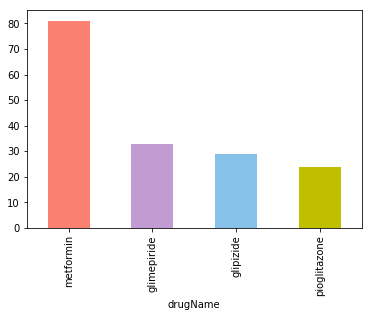

In [74]:
# Some data viz (so we can use in our presentation)

### barchart - count of reviews to show which drugs we focused on and how much data we worked with

value_counts = df_diabetesT2DrugRF2['drugName'].value_counts(dropna=True, sort=True)

# solution here
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['drugName', 'counts'] # change column names
df_value_counts.plot(x='drugName',y='counts', kind='bar', legend=False, 
                     color=['#FA8072','#C39BD3', '#85C1E9', 'y'])
df_value_counts

# we make this this nicer later. unfinished figure


In [ ]:
# Some data viz (so we can use in our presentation)

### some visualization about ratings. Average ratings? Usefulness rating?? (To be done)


We can use methods in this article to do sentiment analysis: 
https://blog.usejournal.com/sentiment-classification-with-natural-language-processing-on-lstm-4dc0497c1f19

or the book (chapter) whichever is easier

In [81]:
# lets drop one of the columns

df_diabetesT2DrugRF2 = df_diabetesT2DrugRF2.drop(['Unnamed: 0'], axis=1)

In [83]:
# download as csv
df_diabetesT2DrugRF2.to_csv('type2_diabetes_drug_reviews.csv')